<a href="https://colab.research.google.com/github/jdbj89/colab_repo/blob/main/Modelo_pago_Nopago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
from IPython.display import display

dataPath="/content/drive/MyDrive/TechTest_DataSci/"

df0 = pd.read_csv(dataPath+"set_datos.csv", sep=';', error_bad_lines=False)

# df0=df0.dropna(axis='columns')

print(df0.columns)

display(df0)

Index(['id_credito', 'numero_radicacion', 'numero_radicacion_credito_antiguo',
       'fecha_originacion', 'valor_esperado', 'capital', 'interes', 'seguros',
       'valor_recibido', 'porcentaje_incorporacion', 'causal_incorporacion',
       'tipo_causal', 'periodo', 'estado_incorporacion', 'estado',
       'valor_otros_conceptos', 'valor_amortizado_cuota', 'tiene_abono',
       'valor_aplicado', 'estado_actual_credito', 'pag_nombre',
       'fecha_inicio_plan_de_pagos', 'fecha_fin_plan_de_pagos',
       'fecha_terminacion_general', 'periodo_terminacion_general',
       'altura_mora_calculada', 'saldo_vencido', 'saldo_capital',
       'capital_mora', 'intereses_corrientes_mora', 'seguros_mora',
       'intereses_mora', 'gastos_cobranza', 'tasa_mensual_credito',
       'credito_nuevo'],
      dtype='object')


,id_credito,numero_radicacion,numero_radicacion_credito_antiguo,fecha_originacion,valor_esperado,capital,interes,seguros,valor_recibido,porcentaje_incorporacion,causal_incorporacion,tipo_causal,periodo,estado_incorporacion,estado,valor_otros_conceptos,valor_amortizado_cuota,tiene_abono,valor_aplicado,estado_actual_credito,pag_nombre,fecha_inicio_plan_de_pagos,fecha_fin_plan_de_pagos,fecha_terminacion_general,periodo_terminacion_general,altura_mora_calculada,saldo_vencido,saldo_capital,capital_mora,intereses_corrientes_mora,seguros_mora,intereses_mora,gastos_cobranza,tasa_mensual_credito,credito_nuevo
0,1693,1,NaN,2013-08-15,124094.0,56041.0,64633.0,3420,124094,100.0,NaN,NaN,2015-09-30,Incorporado,AL_DIA,0.0,124094.0,Sin abono,NaN,PREPAGADO,SECRETARIA DE EDUCACIÓN DEL DISTRITO CAPITAL,2013-09-30,2018-08-30,2016-06-18 00:00:00.0,2016-06-30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1535,NO
1,1693,1,NaN,2013-08-15,124094.0,57248.0,63426.0,3420,124094,100.0,NaN,NaN,2015-10-30,Incorporado,AL_DIA,0.0,124094.0,Sin abono,NaN,PREPAGADO,SECRETARIA DE EDUCACIÓN DEL DISTRITO CAPITAL,2013-09-30,2018-08-30,2016-06-18 00:00:00.0,2016-06-30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1535,NO
2,1693,1,NaN,2013-08-15,124094.0,58481.0,62193.0,3420,124094,100.0,NaN,NaN,2015-11-30,Incorporado,AL_DIA,0.0,124094.0,Sin abono,NaN,PREPAGADO,SECRETARIA DE EDUCACIÓN DEL DISTRITO CAPITAL,2013-09-30,2018-08-30,2016-06-18 00:00:00.0,2016-06-30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1535,NO
3,1693,1,NaN,2013-08-15,124094.0,59740.0,60934.0,3420,124094,100.0,NaN,NaN,2015-12-30,Incorporado,AL_DIA,0.0,124094.0,Sin abono,NaN,PREPAGADO,SECRETARIA DE EDUCACIÓN DEL DISTRITO CAPITAL,2013-09-30,2018-08-30,2016-06-18 00:00:00.0,2016-06-30,0,0.0,2769804.0,0.0,0.0,0.0,0.0,0.0,2.1535,NO
4,1693,1,NaN,2013-08-15,124094.0,61027.0,59647.0,3420,124094,100.0,NaN,NaN,2016-01-30,Incorporado,AL_DIA,0.0,124094.0,Sin abono,NaN,PREPAGADO,SECRETARIA DE EDUCACIÓN DEL DISTRITO CAPITAL,2013-09-30,2018-08-30,2016-06-18 00:00:00.0,2016-06-30,0,0.0,2708777.0,0.0,0.0,0.0,0.0,0.0,2.1535,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282762,66562,36684,NaN,2019-05-07,364347.0,31259.0,267881.0,65207,364347,100.0,NaN,NaN,2019-05-30,Incorporado anticipado,AL_DIA,0.0,364347.0,Sin abono,NaN,ACTIVO,PROTECCIÓN S.A.,2019-05-30,2029-04-30,NaN,NaN,0,0.0,14067741.0,0.0,0.0,0.0,0.0,0.0,1.9000,NO
282763,66563,36729,NaN,2019-05-20,182174.0,11971.0,139956.0,30247,182174,100.0,NaN,NaN,2019-05-30,Incorporado anticipado,AL_DIA,0.0,182174.0,Sin abono,NaN,ACTIVO,SEGUROS BOLIVAR,2019-05-30,2029-04-30,NaN,NaN,0,0.0,6528029.0,0.0,0.0,0.0,0.0,0.0,2.1400,NO
282764,66694,36826,NaN,2019-05-16,347757.0,26703.0,260755.0,60299,347757,100.0,NaN,NaN,2019-05-30,Incorporado anticipado,AL_DIA,0.0,347757.0,Sin abono,NaN,ACTIVO,COLFONDOS,2019-05-30,2029-04-30,NaN,NaN,0,0.0,13011078.0,0.0,0.0,0.0,0.0,0.0,2.0000,NO
282765,66946,36907,NaN,2019-05-24,569154.0,46197.0,422701.0,100256,569154,100.0,NaN,NaN,2019-05-30,Incorporado anticipado,AL_DIA,0.0,569154.0,Sin abono,NaN,ACTIVO,PROTECCIÓN S.A.,2019-05-30,2029-04-30,NaN,NaN,0,0.0,21630803.0,0.0,0.0,0.0,0.0,0.0,1.9500,NO


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282767 entries, 0 to 282766
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id_credito                         282767 non-null  int64  
 1   numero_radicacion                  282767 non-null  int64  
 2   numero_radicacion_credito_antiguo  11985 non-null   float64
 3   fecha_originacion                  282767 non-null  object 
 4   valor_esperado                     282767 non-null  float64
 5   capital                            282125 non-null  float64
 6   interes                            282125 non-null  float64
 7   seguros                            282767 non-null  int64  
 8   valor_recibido                     282767 non-null  int64  
 9   porcentaje_incorporacion           282767 non-null  float64
 10  causal_incorporacion               23450 non-null   object 
 11  tipo_causal                        2283

In [ ]:

df0[['fecha_terminacion_general', 'periodo_terminacion_general']] = df0[['fecha_terminacion_general', 'periodo_terminacion_general']].where(df0[['fecha_terminacion_general', 'periodo_terminacion_general']].isnull(), 1).fillna(0).astype(int)
df0[['numero_radicacion_credito_antiguo']] = df0[['numero_radicacion_credito_antiguo']].where(df0[['numero_radicacion_credito_antiguo']].isnull(), 1).fillna(0).astype(int)

df0=df0.fillna(0)

df0.drop('id_credito', inplace=True, axis=1)
df0.drop('numero_radicacion', inplace=True, axis=1)
df0.drop('fecha_originacion', inplace=True, axis=1)
df0.drop('periodo', inplace=True, axis=1)
df0.drop('fecha_inicio_plan_de_pagos', inplace=True, axis=1)
df0.drop('fecha_fin_plan_de_pagos', inplace=True, axis=1)
df0.drop('pag_nombre', inplace=True, axis=1)
# df0.drop('periodo_terminacion_general', inplace=True, axis=1)

df0.info()

df0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282767 entries, 0 to 282766
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   numero_radicacion_credito_antiguo  282767 non-null  int64  
 1   valor_esperado                     282767 non-null  float64
 2   capital                            282767 non-null  float64
 3   interes                            282767 non-null  float64
 4   seguros                            282767 non-null  int64  
 5   valor_recibido                     282767 non-null  int64  
 6   porcentaje_incorporacion           282767 non-null  float64
 7   causal_incorporacion               282767 non-null  object 
 8   tipo_causal                        282767 non-null  object 
 9   estado_incorporacion               282767 non-null  object 
 10  estado                             282767 non-null  object 
 11  valor_otros_conceptos              2827

,numero_radicacion_credito_antiguo,valor_esperado,capital,interes,seguros,valor_recibido,porcentaje_incorporacion,causal_incorporacion,tipo_causal,estado_incorporacion,estado,valor_otros_conceptos,valor_amortizado_cuota,tiene_abono,valor_aplicado,estado_actual_credito,fecha_terminacion_general,periodo_terminacion_general,altura_mora_calculada,saldo_vencido,saldo_capital,capital_mora,intereses_corrientes_mora,seguros_mora,intereses_mora,gastos_cobranza,tasa_mensual_credito,credito_nuevo
0,0,124094.0,56041.0,64633.0,3420,124094,100.0,0,0,Incorporado,AL_DIA,0.0,124094.0,Sin abono,0.0,PREPAGADO,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1535,NO
1,0,124094.0,57248.0,63426.0,3420,124094,100.0,0,0,Incorporado,AL_DIA,0.0,124094.0,Sin abono,0.0,PREPAGADO,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1535,NO
2,0,124094.0,58481.0,62193.0,3420,124094,100.0,0,0,Incorporado,AL_DIA,0.0,124094.0,Sin abono,0.0,PREPAGADO,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1535,NO
3,0,124094.0,59740.0,60934.0,3420,124094,100.0,0,0,Incorporado,AL_DIA,0.0,124094.0,Sin abono,0.0,PREPAGADO,1,1,0,0.0,2769804.0,0.0,0.0,0.0,0.0,0.0,2.1535,NO
4,0,124094.0,61027.0,59647.0,3420,124094,100.0,0,0,Incorporado,AL_DIA,0.0,124094.0,Sin abono,0.0,PREPAGADO,1,1,0,0.0,2708777.0,0.0,0.0,0.0,0.0,0.0,2.1535,NO


In [ ]:
df0.drop('credito_nuevo', inplace=True, axis=1)

In [ ]:
print(df0.columns)

for i in df0.columns:
  # print(i)
  if df0.dtypes[i]==object:

      if i=='estado':

        df1 = df0[[i]].copy()
        df1['category_id'] = df1['estado'].factorize()[0]  # otorga un valor para cada tipo de dato
        category_id_df = df1[['estado', 'category_id']].drop_duplicates().sort_values('category_id')
        category_to_id = dict(category_id_df.values)
        id_to_category = dict(category_id_df[['category_id', 'estado']].values)

        print(category_id_df)
        print(category_to_id)
        print(id_to_category)


      df0[i] = df0[i].factorize()[0]  # otorga un valor para cada tipo de dato. 0-procedure 1-history 2-medicine 3-none --JD




      # category_id_df = df0[[i]].drop_duplicates()
      # category_to_id = dict(category_id_df.values)
      # id_to_category = dict(category_id_df[['category_id', 'Type']].values)
      # print(category_id_df)



df0.info()

df0.head()

Index(['numero_radicacion_credito_antiguo', 'valor_esperado', 'capital',
       'interes', 'seguros', 'valor_recibido', 'porcentaje_incorporacion',
       'causal_incorporacion', 'tipo_causal', 'estado_incorporacion', 'estado',
       'valor_otros_conceptos', 'valor_amortizado_cuota', 'tiene_abono',
       'valor_aplicado', 'estado_actual_credito', 'fecha_terminacion_general',
       'periodo_terminacion_general', 'altura_mora_calculada', 'saldo_vencido',
       'saldo_capital', 'capital_mora', 'intereses_corrientes_mora',
       'seguros_mora', 'intereses_mora', 'gastos_cobranza',
       'tasa_mensual_credito'],
      dtype='object')
   estado  category_id
0  AL_DIA            0
9    MORA            1
{'AL_DIA': 0, 'MORA': 1}
{0: 'AL_DIA', 1: 'MORA'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282767 entries, 0 to 282766
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----

,numero_radicacion_credito_antiguo,valor_esperado,capital,interes,seguros,valor_recibido,porcentaje_incorporacion,causal_incorporacion,tipo_causal,estado_incorporacion,estado,valor_otros_conceptos,valor_amortizado_cuota,tiene_abono,valor_aplicado,estado_actual_credito,fecha_terminacion_general,periodo_terminacion_general,altura_mora_calculada,saldo_vencido,saldo_capital,capital_mora,intereses_corrientes_mora,seguros_mora,intereses_mora,gastos_cobranza,tasa_mensual_credito
0,0,124094.0,56041.0,64633.0,3420,124094,100.0,0,0,0,0,0.0,124094.0,0,0.0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1535
1,0,124094.0,57248.0,63426.0,3420,124094,100.0,0,0,0,0,0.0,124094.0,0,0.0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1535
2,0,124094.0,58481.0,62193.0,3420,124094,100.0,0,0,0,0,0.0,124094.0,0,0.0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1535
3,0,124094.0,59740.0,60934.0,3420,124094,100.0,0,0,0,0,0.0,124094.0,0,0.0,0,1,1,0,0.0,2769804.0,0.0,0.0,0.0,0.0,0.0,2.1535
4,0,124094.0,61027.0,59647.0,3420,124094,100.0,0,0,0,0,0.0,124094.0,0,0.0,0,1,1,0,0.0,2708777.0,0.0,0.0,0.0,0.0,0.0,2.1535


In [ ]:
df0.drop_duplicates(inplace = True)


labels=df0['estado']
df0.drop('estado', inplace=True, axis=1)

df_mean = df0.mean()
df_std = df0.std()
df_norm = (df0 - df_mean)/df_std

print("Normalized the values.")

df_norm.info()
df_norm.head()

Normalized the values.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 281336 entries, 0 to 282765
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   numero_radicacion_credito_antiguo  281336 non-null  float64
 1   valor_esperado                     281336 non-null  float64
 2   capital                            281336 non-null  float64
 3   interes                            281336 non-null  float64
 4   seguros                            281336 non-null  float64
 5   valor_recibido                     281336 non-null  float64
 6   porcentaje_incorporacion           281336 non-null  float64
 7   causal_incorporacion               281336 non-null  float64
 8   tipo_causal                        281336 non-null  float64
 9   estado_incorporacion               281336 non-null  float64
 10  valor_otros_conceptos              281336 non-null  float64
 11  valor_amortizado

,numero_radicacion_credito_antiguo,valor_esperado,capital,interes,seguros,valor_recibido,porcentaje_incorporacion,causal_incorporacion,tipo_causal,estado_incorporacion,valor_otros_conceptos,valor_amortizado_cuota,tiene_abono,valor_aplicado,estado_actual_credito,fecha_terminacion_general,periodo_terminacion_general,altura_mora_calculada,saldo_vencido,saldo_capital,capital_mora,intereses_corrientes_mora,seguros_mora,intereses_mora,gastos_cobranza,tasa_mensual_credito
0,-0.210894,-0.913524,-0.217303,-0.923286,-0.998577,-0.797522,0.219263,-0.221585,-0.279079,-0.371984,-0.055846,-0.690586,-0.012648,-0.007519,-1.168328,1.201098,1.201098,-0.219753,0.172966,-1.097430,-0.152298,-0.178643,-0.168275,-0.098586,-0.153894,1.187125
1,-0.210894,-0.913524,-0.211760,-0.927357,-0.998577,-0.797522,0.219263,-0.221585,-0.279079,-0.371984,-0.055846,-0.690586,-0.012648,-0.007519,-1.168328,1.201098,1.201098,-0.219753,0.172966,-1.097430,-0.152298,-0.178643,-0.168275,-0.098586,-0.153894,1.187125
2,-0.210894,-0.913524,-0.206097,-0.931515,-0.998577,-0.797522,0.219263,-0.221585,-0.279079,-0.371984,-0.055846,-0.690586,-0.012648,-0.007519,-1.168328,1.201098,1.201098,-0.219753,0.172966,-1.097430,-0.152298,-0.178643,-0.168275,-0.098586,-0.153894,1.187125
3,-0.210894,-0.913524,-0.200315,-0.935761,-0.998577,-0.797522,0.219263,-0.221585,-0.279079,-0.371984,-0.055846,-0.690586,-0.012648,-0.007519,-1.168328,1.201098,1.201098,-0.219753,0.172966,-0.909808,-0.152298,-0.178643,-0.168275,-0.098586,-0.153894,1.187125
4,-0.210894,-0.913524,-0.194404,-0.940102,-0.998577,-0.797522,0.219263,-0.221585,-0.279079,-0.371984,-0.055846,-0.690586,-0.012648,-0.007519,-1.168328,1.201098,1.201098,-0.219753,0.172966,-0.913942,-0.152298,-0.178643,-0.168275,-0.098586,-0.153894,1.187125


Feature: 0, Score: -0.00506
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.00250
Feature: 7, Score: 0.00801
Feature: 8, Score: 0.11032
Feature: 9, Score: -0.00069
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: 0.21265
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.02278
Feature: 15, Score: -0.04119
Feature: 16, Score: -0.04119
Feature: 17, Score: 0.00120
Feature: 18, Score: -0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: -0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: -0.00000
Feature: 23, Score: -0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: -0.05180


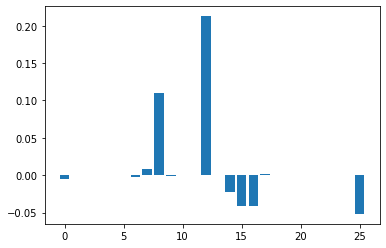

In [ ]:
import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

features=df0

model = LinearRegression()
# fit the model
model.fit(features, labels)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: -0.00102
Feature: 1, Score: 0.10451
Feature: 2, Score: 0.07025
Feature: 3, Score: 0.10223
Feature: 4, Score: -0.00182
Feature: 5, Score: 0.17686
Feature: 6, Score: -0.06773
Feature: 7, Score: 0.02401
Feature: 8, Score: 0.04064
Feature: 9, Score: -0.00089
Feature: 10, Score: 0.05184
Feature: 11, Score: -0.46460
Feature: 12, Score: 0.00269
Feature: 13, Score: 0.07451
Feature: 14, Score: -0.05359
Feature: 15, Score: -0.02025
Feature: 16, Score: -0.02025
Feature: 17, Score: 0.12059
Feature: 18, Score: -0.06470
Feature: 19, Score: 0.01087
Feature: 20, Score: -0.05370
Feature: 21, Score: -0.11720
Feature: 22, Score: -0.02178
Feature: 23, Score: -0.00647
Feature: 24, Score: 0.00826
Feature: 25, Score: -0.00574


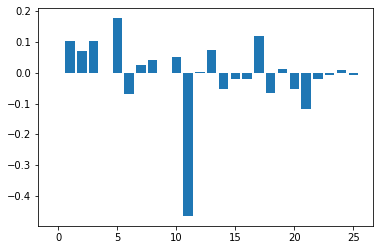

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

features2=df_norm

model2 = LinearRegression()
# fit the model
model2.fit(features2, labels)
# get importance
importance2 = model2.coef_
# summarize feature importance
for i,v in enumerate(importance2):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance2))], importance2)
pyplot.show()

Feature 0: 0.636161
Feature 1: 2846.518875
Feature 2: 1624.143600
Feature 3: 1349.804275
Feature 4: 57.093208
Feature 5: 1928.110988
Feature 6: 88374.872751
Feature 7: 54580.046863
Feature 8: 103101.568083
Feature 9: 5038.980303
Feature 10: 6.016385
Feature 11: 15530.749570
Feature 12: 4.068766
Feature 13: 1.429282
Feature 14: 12214.005726
Feature 15: 515.860271
Feature 16: 515.860271
Feature 17: 87498.029490
Feature 18: 55176.738432
Feature 19: 2373.180397
Feature 20: 33830.625881
Feature 21: 51268.869033
Feature 22: 43838.636503
Feature 23: 13112.933845
Feature 24: 35420.201292
Feature 25: 883.066410


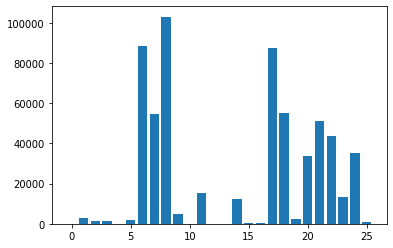

In [ ]:

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.636161
Feature 1: 2846.518875
Feature 2: 1624.143600
Feature 3: 1349.804275
Feature 4: 57.093208
Feature 5: 1928.110988
Feature 6: 88374.872751
Feature 7: 54580.046863
Feature 8: 103101.568083
Feature 9: 5038.980303
Feature 10: 6.016385
Feature 11: 15530.749570
Feature 12: 4.068766
Feature 13: 1.429282
Feature 14: 12214.005726
Feature 15: 515.860271
Feature 16: 515.860271
Feature 17: 87498.029490
Feature 18: 55176.738432
Feature 19: 2373.180397
Feature 20: 33830.625881
Feature 21: 51268.869033
Feature 22: 43838.636503
Feature 23: 13112.933845
Feature 24: 35420.201292
Feature 25: 883.066410


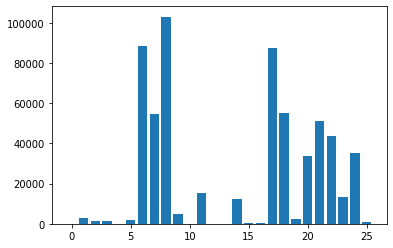

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features2, labels, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# from sklearn.feature_selection import mutual_info_regression

# # feature selection
# def select_features2(X_train, y_train, X_test):
# 	# configure to select all features
# 	fs = SelectKBest(score_func=mutual_info_regression, k='all')
# 	# learn relationship from training data
# 	fs.fit(X_train, y_train)
# 	# transform train input data
# 	X_train_fs = fs.transform(X_train)
# 	# transform test input data
# 	X_test_fs = fs.transform(X_test)
# 	return X_train_fs, X_test_fs, fs

# # load the dataset

# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=1)
# # feature selection
# X_train_fs, X_test_fs, fs = select_features2(X_train, y_train, X_test)
# # what are scores for the features
# for i in range(len(fs.scores_)):
# 	print('Feature %d: %f' % (i, fs.scores_[i]))
# # plot the scores
# pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
# pyplot.show()

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features2, labels, test_size=0.33, random_state=1)
# fit the model
# model = LinearRegression()
model = LinearSVC()

model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)


MAE: 0.010


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


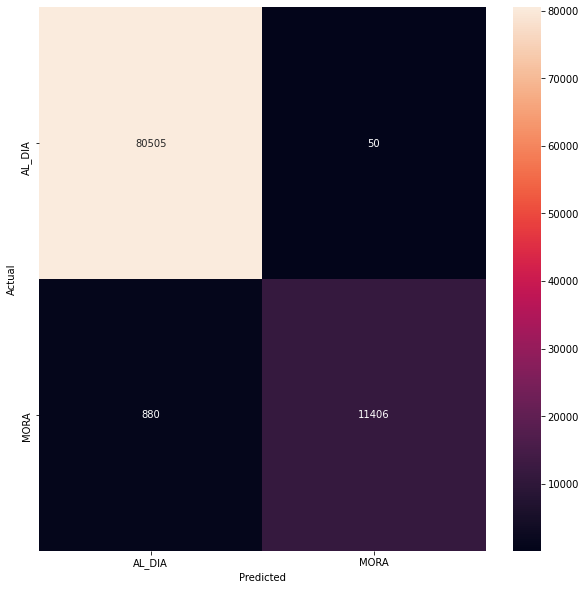

              precision    recall  f1-score   support

      AL_DIA       0.99      1.00      0.99     80555
        MORA       1.00      0.93      0.96     12286

    accuracy                           0.99     92841
   macro avg       0.99      0.96      0.98     92841
weighted avg       0.99      0.99      0.99     92841



In [ ]:
conf_mat = confusion_matrix(y_test, yhat)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.estado.values, yticklabels=category_id_df.estado.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, yhat, target_names=df1['estado'].unique()))

[[-2.08605702e-03  5.33895122e+00 -1.64106829e-01 -3.39956885e-01
  -1.12205384e-01 -4.02753177e-02 -3.04394267e-02  2.91589563e-02
   4.90466687e-02 -5.51361762e-04 -5.79080478e-02 -5.42700638e+00
  -2.25365873e-02 -1.33975561e-02 -4.24020075e-02 -1.58586048e-02
  -1.58586048e-02  6.36495337e-01 -8.82994115e-01  1.61274867e-01
   1.59919012e+01 -7.60593086e+00  4.25275985e-01  4.54826817e+00
   2.96253990e-01 -4.52450378e-04]]
Feature: 0, Score: -0.00209
Feature: 1, Score: 5.33895
Feature: 2, Score: -0.16411
Feature: 3, Score: -0.33996
Feature: 4, Score: -0.11221
Feature: 5, Score: -0.04028
Feature: 6, Score: -0.03044
Feature: 7, Score: 0.02916
Feature: 8, Score: 0.04905
Feature: 9, Score: -0.00055
Feature: 10, Score: -0.05791
Feature: 11, Score: -5.42701
Feature: 12, Score: -0.02254
Feature: 13, Score: -0.01340
Feature: 14, Score: -0.04240
Feature: 15, Score: -0.01586
Feature: 16, Score: -0.01586
Feature: 17, Score: 0.63650
Feature: 18, Score: -0.88299
Feature: 19, Score: 0.16127
Fea

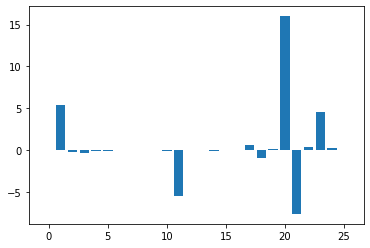

In [ ]:
importance = model.coef_

print(importance)

# summarize feature importance
for i,v in enumerate(importance[0]):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance[0]))], importance[0])
pyplot.show()

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features2, labels, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.130
